In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [4]:
import sqlite3
conn = sqlite3.connect('../data/hist_prices.db')
c = conn.cursor()

In [5]:
data = pd.read_sql('''SELECT * FROM bitcoin''', conn)
data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [6]:
# Add some more features derived from the exiting ones
data['Range'] = data.High - data.Low
data['Difference'] = data.Close - data.Open

In [7]:
data.drop(labels='SNo', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        2991 non-null   object 
 1   Symbol      2991 non-null   object 
 2   Date        2991 non-null   object 
 3   High        2991 non-null   float64
 4   Low         2991 non-null   float64
 5   Open        2991 non-null   float64
 6   Close       2991 non-null   float64
 7   Volume      2991 non-null   float64
 8   Marketcap   2991 non-null   float64
 9   Range       2991 non-null   float64
 10  Difference  2991 non-null   float64
dtypes: float64(8), object(3)
memory usage: 257.2+ KB


In [8]:
#Converting Date column to Datetime
data['Date'] = pd.to_datetime(data['Date'])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Name        2991 non-null   object        
 1   Symbol      2991 non-null   object        
 2   Date        2991 non-null   datetime64[ns]
 3   High        2991 non-null   float64       
 4   Low         2991 non-null   float64       
 5   Open        2991 non-null   float64       
 6   Close       2991 non-null   float64       
 7   Volume      2991 non-null   float64       
 8   Marketcap   2991 non-null   float64       
 9   Range       2991 non-null   float64       
 10  Difference  2991 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 257.2+ KB


In [10]:
data.describe()

,High,Low,Open,Close,Volume,Marketcap,Range,Difference
count,2991.000000,2991.000000,2991.000000,2991.000000,2.991000e+03,2.991000e+03,2991.000000,2991.000000
mean,6893.326038,6486.009539,6700.146240,6711.290443,1.090633e+10,1.208761e+11,407.316500,11.144203
std,11642.832456,10869.032130,11288.043736,11298.141921,1.888895e+10,2.109438e+11,944.453536,587.819018
min,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08,0.000000,-7563.999292
25%,436.179001,422.879486,430.445496,430.569489,3.036725e+07,6.305579e+09,11.368847,-17.568008
50%,2387.610107,2178.500000,2269.889893,2286.409912,9.460360e+08,3.741503e+10,74.416016,1.013000
75%,8733.926948,8289.800459,8569.656494,8576.238715,1.592015e+10,1.499957e+11,333.255080,34.023978
max,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12,12864.619573,7309.636429


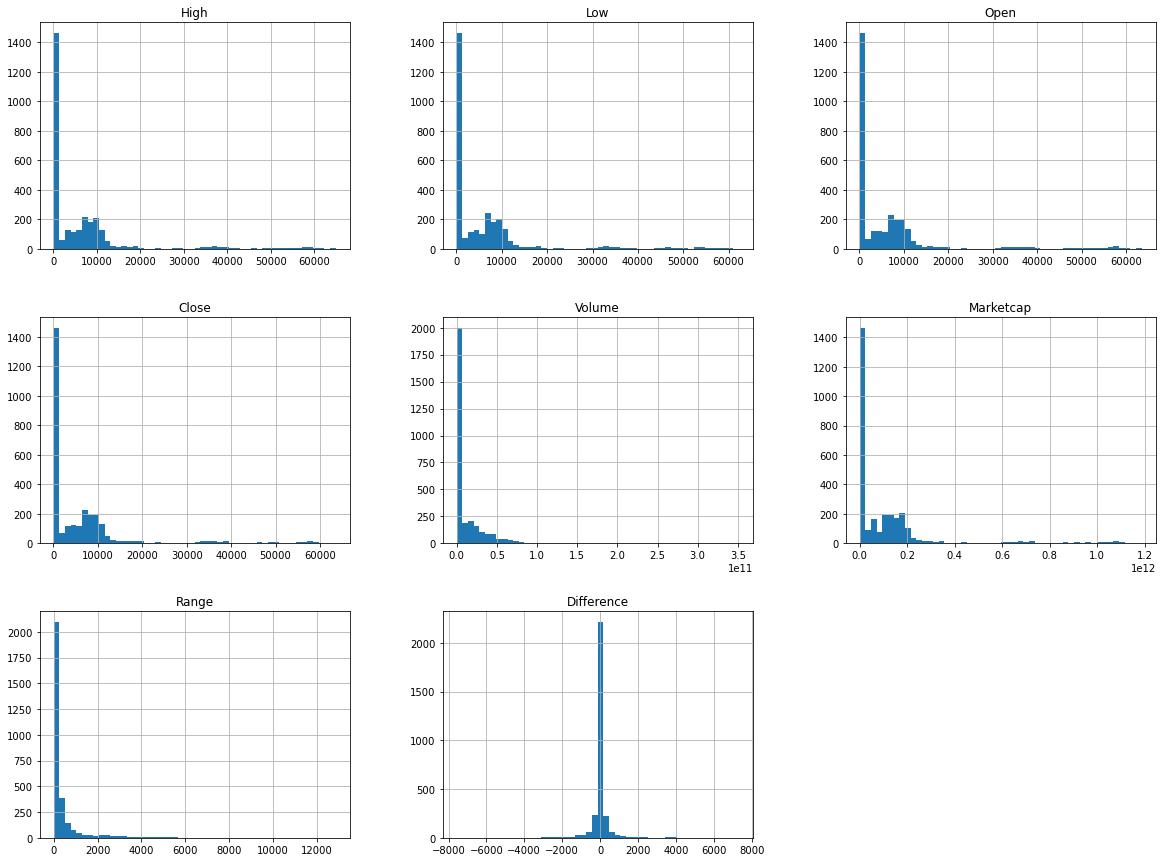

In [11]:
data[['High','Low','Open','Close','Volume','Marketcap','Range','Difference']].hist(bins=50, figsize = (20, 15))
plt.show();

In [12]:
#Days with the biggest price loss
data[['Date', 'Difference']].sort_values(by='Difference').head(10).T

,2935,2942,2857,2824,2911,2975,2927,2877,2856,2944
Date,2021-05-12 23:59:59,2021-05-19 23:59:59,2021-02-23 23:59:59,2021-01-21 23:59:59,2021-04-18 23:59:59,2021-06-21 23:59:59,2021-05-04 23:59:59,2021-03-15 23:59:59,2021-02-22 23:59:59,2021-05-21 23:59:59
Difference,-7563.999292,-5942.534981,-5380.502887,-4723.698903,-4485.701091,-3964.452332,-3880.641008,-3360.228823,-3325.419799,-3292.257651


In [13]:
# Days with the biggest price gain
data[['Date', 'Difference']].sort_values(by='Difference', ascending=False).head(10).T

,2842,2919,2863,2853,2923,2928,2943,2947,2963,2875
Date,2021-02-08 23:59:59,2021-04-26 23:59:59,2021-03-01 23:59:59,2021-02-19 23:59:59,2021-04-30 23:59:59,2021-05-05 23:59:59,2021-05-20 23:59:59,2021-05-24 23:59:59,2021-06-09 23:59:59,2021-03-13 23:59:59
Difference,7309.636429,4943.962424,4471.738318,4212.152397,4181.513762,4171.841187,4029.068554,4005.615069,3928.143635,3899.714518


In [18]:
fig = px.line(data, x='Date', y="Close")
fig.show();

In [19]:
fig = px.line(data, x='Date', y="Marketcap")
fig.show();

In [20]:
fig = px.line(data, x='Date', y="Difference")
fig.show();

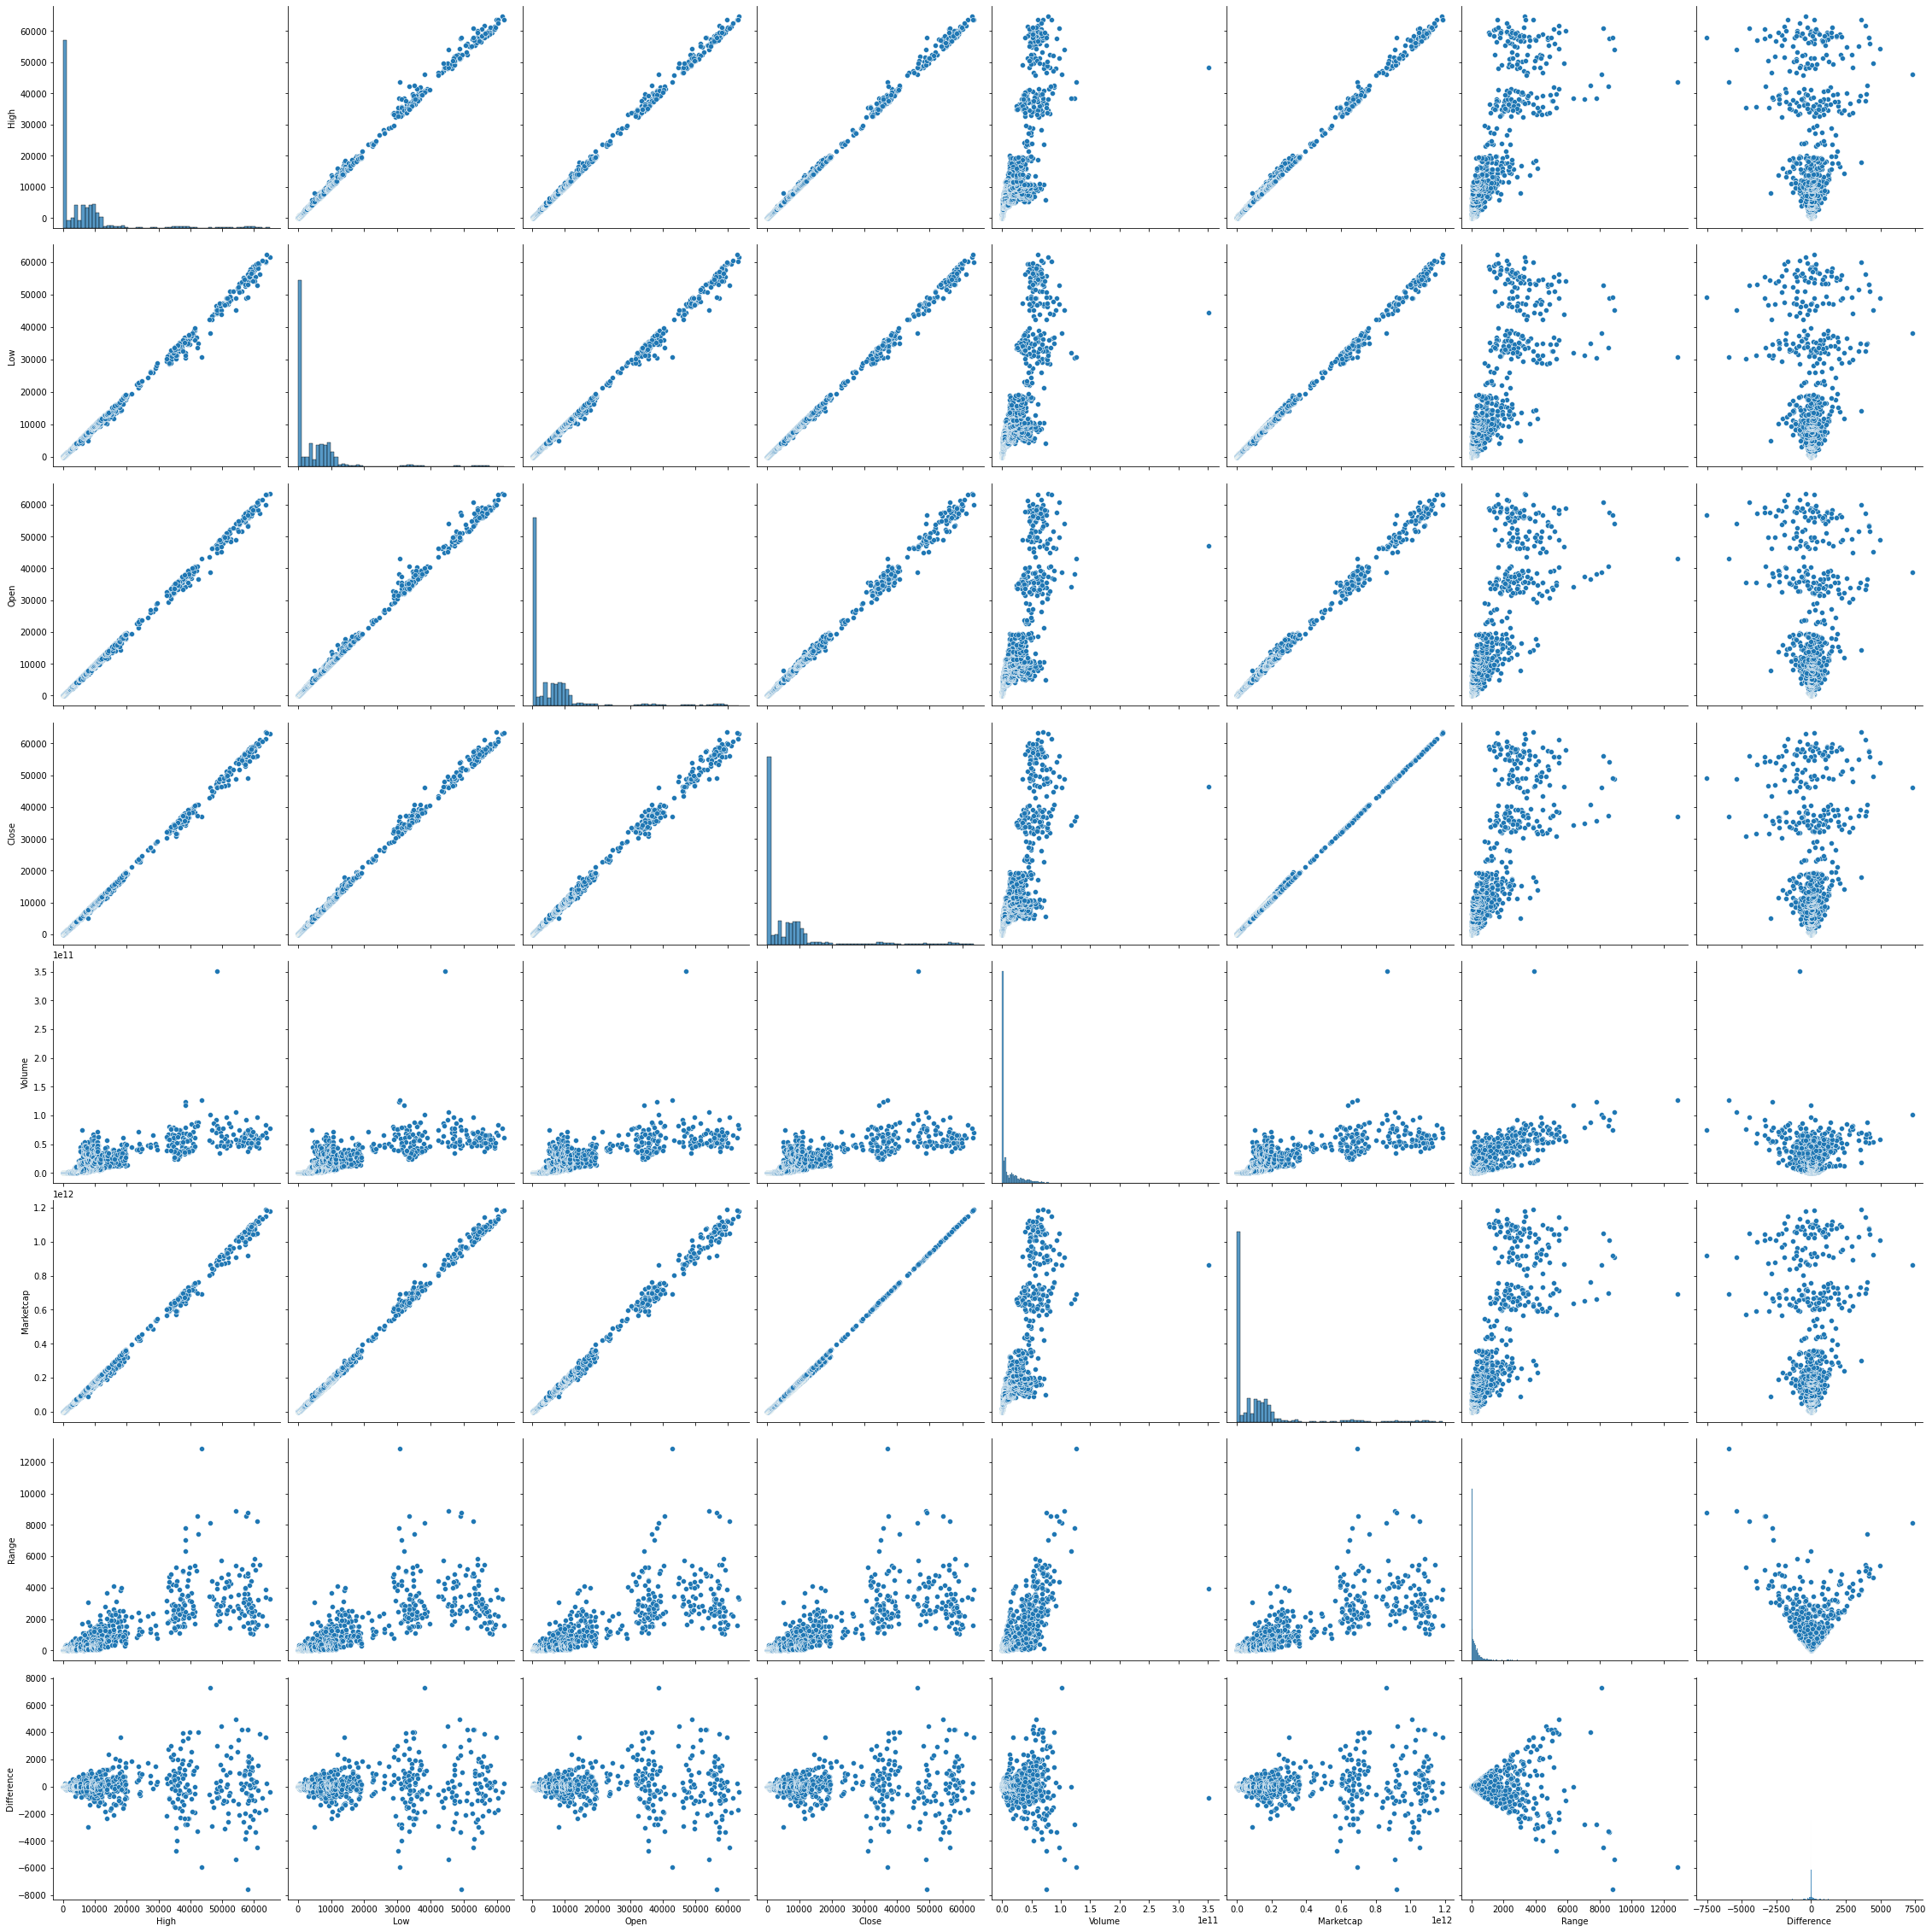

In [21]:
sns.pairplot(data,height=4);
